# Import and plot ASCII log data (.las)
### Must install 'lasio' the first time running the application

In [1]:
# pip install lasio
# https://lasio.readthedocs.io/en/latest/basic-example.html

## Import Python Libraries

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import math
import lasio

## Read wireline log (.las) file and core plug analysis (.xlsx) files

In [47]:
# Read las and core plub data from Github

import requests
import io
from io import BytesIO

# Note had to add '%20' into spaces in file name
url = "https://raw.githubusercontent.com/dmadvoc/Petroleum-Geology-Analyses/main/sE4%202523195%2048x-28%20deep.las"
download = requests.get(url).content
las = lasio.read(io.StringIO(download.decode('utf-8')))

# Read sheets from XLSX file
# Note, You can not get the url path by clicking on "RAW" as with the CSV file, You'll have to know the sheet names
url2 = "https://raw.githubusercontent.com/dmadvoc/Petroleum-Geology-Analyses/main/sE4 2523195 48x-28 Core.xlsx"
download2 = requests.get(url2).content
df1 = pd.read_excel(BytesIO(download2), sheet_name='Plug Data')
df2 = pd.read_excel(BytesIO(download2), sheet_name='Tops')

print(las.curves)
print( '\n','Plug Data - df1', '\n',
df1.head())

print( '\n','Tops Data - df2', '\n',
df2.head())


Mnemonic  Unit  Value  Description                                                      
--------  ----  -----  -----------                                                      
DEPT      F            DEPTH (BOREHOLE) {F10.1}                                         
BS        IN           Bit Size {F13.4}                                                 
DPHZ      CFCF         HRDD Standard Resolution Density Porosity {F13.4}                
FCD       IN           Future Casing Diameter {F13.4}                                   
GR        GAPI         Gamma-Ray {F13.4}                                                
HCAL      IN           HRCC Cal. Caliper {F13.4}                                        
HDRA      G/C3         HRDD Density Correction {F13.4}                                  
ICV       F3           Integrated Cement Volume {F13.4}                                 
NPOR      CFCF         Enhanced Thermal Neutron Porosity {F13.4}                        
PEFZ                 

In [ ]:
# Read las files from local drive

# las = lasio.read('/Users/davidadvocate/Documents/Python/Data/sE4 2523195 48x-28 deep.las')
# # print(las.curves)

# # Read in core porosity data 
# df1 = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE4 2523195 48x-28 Core.xlsx',
#                     sheet_name='Plug Data')

# df2 = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE4 2523195 48x-28 Core.xlsx',
#                     sheet_name='Tops')

## Convert wireline data (.las) file to a dataframe, filter data and set pay cutoffs

In [16]:

# Convert log data to a dataframe and edit ##########################
df = las.df()
df.reset_index(inplace=True)
df['DEPTH'] = df['DEPT']         # LAS files usually have DEPT as the Index
df['GR_Cutoff'] = 38
Top=5300                         # Top of analysis interval
Bas=5700                         # Base of analysis interval
GR_Cutoff= 38                    # SET GR CUTOFF for filling under curve
df=df[['DEPTH','GR','RHOZ','NPOR','DPHZ', 'PEFZ','GR_Cutoff']]

# Filter the data by depth ##########################################
df = df[(df['DEPTH']>=Top) & (df['DEPTH'] <= Bas)]

print('Wireline Log Data')
display(df)

print('\n', 'Describe Wireline Log Data')
df.describe()

Wireline Log Data


,DEPTH,GR,RHOZ,NPOR,DPHZ,PEFZ,GR_Cutoff
136,5700.0,15.9788,2.5411,0.2100,0.0660,3.4259,38
137,5699.5,12.7703,2.5275,0.2195,0.0742,3.3354,38
138,5699.0,11.8428,2.5142,0.2487,0.0823,3.2507,38
139,5698.5,11.6358,2.4997,0.3184,0.0911,3.1779,38
140,5698.0,12.2615,2.4850,0.1953,0.1000,3.0847,38
...,...,...,...,...,...,...,...
932,5302.0,45.8334,2.8334,0.0702,-0.1111,4.5567,38
933,5301.5,64.6052,2.7835,0.1539,-0.0809,4.0814,38
934,5301.0,79.9285,2.7447,0.1692,-0.0574,3.7692,38
935,5300.5,95.2076,2.7401,0.1875,-0.0546,3.5227,38



 Describe Wireline Log Data


,DEPTH,GR,RHOZ,NPOR,DPHZ,PEFZ,GR_Cutoff
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0
mean,5500.000000,47.794071,2.657028,0.099858,-0.004259,3.058918,38.0
std,115.686538,38.529032,0.163476,0.063173,0.099075,0.873990,0.0
min,5300.000000,9.115800,1.809300,-0.004800,-0.231500,2.015100,38.0
25%,5400.000000,24.526200,2.533500,0.064200,-0.067200,2.256500,38.0
50%,5500.000000,30.983200,2.660300,0.090300,-0.006300,3.077100,38.0
75%,5600.000000,51.079100,2.761000,0.121500,0.070600,3.439300,38.0
max,5700.000000,165.691600,3.032000,0.639100,0.509500,5.783500,38.0


## Prepare core plug data for plotting

In [35]:
phi = df1[['DEPTH', 'PHI_Plug']]
phi['PHI_Plug'] = phi['PHI_Plug'] / 100

phi.head()

<ipython-input-35-b8c9418c4212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi['PHI_Plug'] = phi['PHI_Plug'] / 100


,DEPTH,PHI_Plug
0,5462.2,0.034967
1,5462.8,0.035618
2,5463.6,0.039181
3,5464.1,0.063427
4,5464.3,0.066671


## Calculate Isopach from Tops and convert Tops to lists for annotations
- 

In [50]:
#### Isopach
df2['ISO']= df2['DEPTH'].shift(-1)-df2['DEPTH']

# X, Y and the text(n) to be in list form  for annotations #################################
df2['y'] = df2['y'] * 0 + 3               # y is a constant value for placing annotations, initially = -20
x=df2['DEPTH'].to_list()
y=df2['y'].to_list()
n=df2['Form Alias'].to_list()
print(x,'\n', y, '\n', n)

[5459.63, 5486.65, 5567.68, 5569.68, 5576.69, 5577.69, 5588.69, 5603.7, 5610.7, 5621.7, 5640.71, 5660.72] 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] 
 ['A Sand', 'B Dolo', 'C1 Sand', 'B Sand', 'C1 Dolo', 'C2 Dolo', 'C3 Sand', 'C4 Dolo', 'C4 Sand', 'D Dolo', 'D Sand', 'E Dolo']


## Wireline Curve Plots
- ax1 is the top, ax3 is the bottom plot
- sharex=True <<<<<< All plots share the same x labels
- gridspec_kw={'hspace': 0} <<<<<< Causes only one x axis for all three plots
- https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html


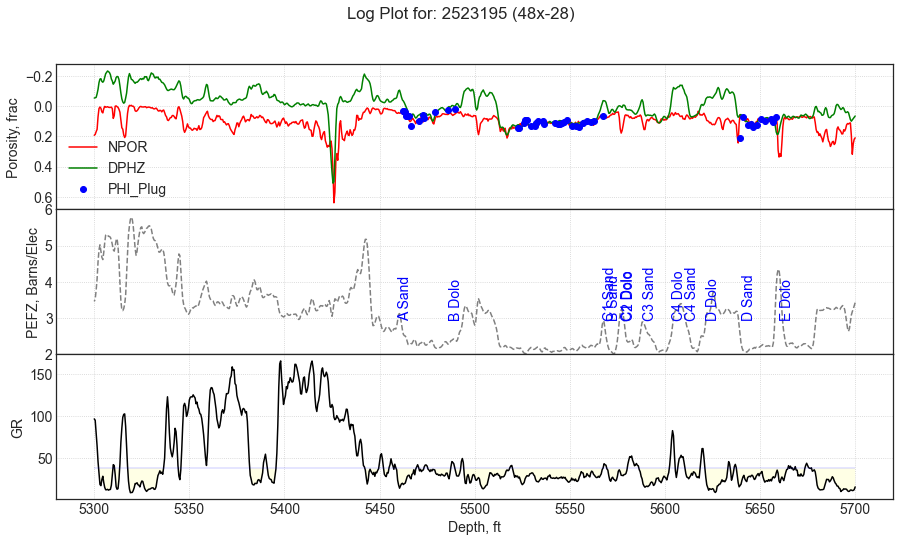

In [27]:
# Set Global Parameters
plt.rcParams.update({'font.size': 14}) # Global command must set in top
plt.rcParams["figure.figsize"]=15,8    #10 x 8 is default figure size in Jupyter Notebook
plt.style.use('seaborn-white')

# Set-up Subplots and plot curves ###########################################
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0}) 
ax3.plot(df['DEPTH'], df['GR'], label='GR', c='k')
ax3.plot(df['DEPTH'], df['GR_Cutoff'], c='b', linewidth = .2)
ax2.plot(df['DEPTH'], df['PEFZ'], label='PEFZ', c='gray', linestyle= '--')
ax1.plot(df['DEPTH'], df['NPOR'], label='NPOR', c='r')
ax1.plot(df['DEPTH'], df['DPHZ'], label='DPHZ', c='g')
ax1.plot(phi['DEPTH'], phi['PHI_Plug'], 'o', label='PHI_Plug', c='b' )

# Formation Tops Annoation ##################################################
for i, txt in enumerate(n):
       ax2.annotate(txt, (x[i], y[i]), rotation=90, c='b')

# Titles and Axis Labels ####################################################
fig.suptitle('Log Plot for: 2523195 (48x-28)')
ax1.set_ylabel('Porosity, frac')
ax2.set_ylabel('PEFZ, Barns/Elec')
ax3.set_ylabel('GR')
ax3.set_xlabel('Depth, ft')

# Axis Inversion, Legends and Grids ########################################
ax1.invert_yaxis()         # Inverts the axis direction

ax2.set_ylim([2,6])        # Set axis scale limits for subplot

ax1.legend(loc='lower left', shadow=True)

ax1.grid(True, linestyle = ':')
ax2.grid(True, linestyle = ':')
ax3.grid(True, linestyle = ':')

# Fill between Curves ######################################################
ax3.fill_between(df['DEPTH'], df['GR'], df['GR_Cutoff'],where=df['GR'] <= df['GR_Cutoff'],
                 facecolor='yellow', alpha=.1, interpolate=True)

plt.show()

### Calculate Net Pay

In [53]:
# Define Net Pay for GR <= 38, RHOZ <= 2.5 and DEPTH  >= 5300
df.sort_values(by=['DEPTH'], inplace=True, ascending=True)

df3=df
# Initialize Pay(Zero) and Define Pay = 1. This gives a count of the beds. Remember each bed is 0.5 ft thick
df3['PAY']= 0
df3.loc[(df3['GR'] < 38) & (df3['RHOZ'] <= 2.6) & (df3['PEFZ'] <= 2.5) & (df3['DEPTH'] >= 5300), 'PAY'] = 1

# Count the number of beds using contiguous 0's and 1's.
# Initialize BED_ID and increment a new BED_ID for each new bed
df3['BED_ID'] = 0
df3['BED_ID'] = (df3['PAY'] != df3['PAY'].shift(1)).cumsum()

sum_pay = df3['PAY'].sum()
net_sand = sum_pay * .5

print('Wireline log Data', '\n', df3.head())
print('Pay: ' + str(sum_pay))
print('Net Sand: ' + str(net_sand))

Wireline log Data 
       DEPTH       GR    RHOZ    NPOR    DPHZ    PEFZ  GR_Cutoff  PAY  BED_ID
936  5300.0  96.7999  2.7373  0.1931 -0.0529  3.4602         38    0       1
935  5300.5  95.2076  2.7401  0.1875 -0.0546  3.5227         38    0       1
934  5301.0  79.9285  2.7447  0.1692 -0.0574  3.7692         38    0       1
933  5301.5  64.6052  2.7835  0.1539 -0.0809  4.0814         38    0       1
932  5302.0  45.8334  2.8334  0.0702 -0.1111  4.5567         38    0       1
Pay: 221
Net Sand: 110.5


### Summarize Pay by Formation

In [29]:
# Add Formation names to the log data
df4=pd.merge_asof(df3, df2, on='DEPTH')         # asof is 'as of', similar to a left merge
df4.drop(['GR_Cutoff', 'Well Number', 'API Number', 'y'], axis=1, inplace=True)
#print(df4.to_string())

In [30]:
# Calculate net Pay by Formation using Groupby (A quick method but doesn't allow easy calculation of net-to-Gross)
pay=df4.groupby(['Form Alias']).agg({"PAY": ["sum" , "count"]})
total=pay.sum()
display(pay, total)


PAY      
            sum count
Form Alias           
A Sand       26    54
B Dolo      104   162
B Sand        6    14
C1 Dolo       0     2
C1 Sand       0     4
C2 Dolo       0    22
C3 Sand      20    30
C4 Dolo       0    14
C4 Sand      10    22
D Dolo        2    38
D Sand       33    40
E Dolo       20    79

PAY  sum      221
     count    481
dtype: int64

In [31]:
# Calculate net Pay and Net-to-Gross for by Formation
pivot_table = df4.pivot_table(index= 'Form Alias',
                             values=['DEPTH','PAY'],
                             aggfunc=[np.count_nonzero, np.sum],
                             margins=True,
                             margins_name='Total').reset_index()
#df4.info() 
# NOTE: Columns must be in same order as listed in .info command
pivot_table.columns=['FM','cnt_DEPTH','cnt_PAY','sum_DEPTH','sum_PAY']  # Rename Columns    
pivot_table.drop(['cnt_PAY','sum_DEPTH'], axis=1, inplace=True)         # Drop unwanded columns
pivot_table['NTG'] =  pivot_table['sum_PAY'] / pivot_table['cnt_DEPTH'] # Calculate Net-to-Gross
print(pivot_table.to_string(index=False))

      FM  cnt_DEPTH  sum_PAY       NTG
  A Sand       54.0       26  0.481481
  B Dolo      162.0      104  0.641975
  B Sand       14.0        6  0.428571
 C1 Dolo        2.0        0  0.000000
 C1 Sand        4.0        0  0.000000
 C2 Dolo       22.0        0  0.000000
 C3 Sand       30.0       20  0.666667
 C4 Dolo       14.0        0  0.000000
 C4 Sand       22.0       10  0.454545
  D Dolo       38.0        2  0.052632
  D Sand       40.0       33  0.825000
  E Dolo       79.0       20  0.253165
   Total      481.0      221  0.459459


### Plot Log with PAY in GR Track

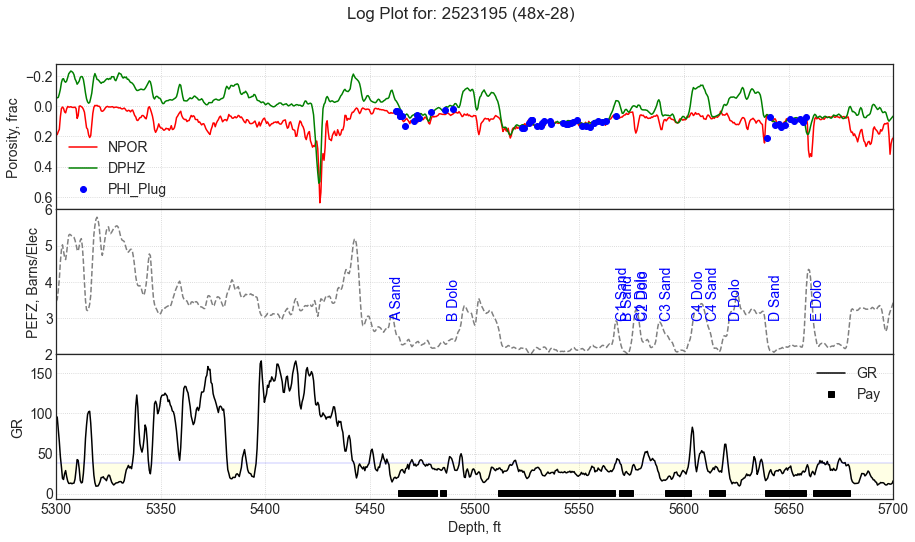

In [33]:
# Set-up Subplots and plot curves ###########################################
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0}) 
ax3.plot(df['DEPTH'], df['GR'], label='GR', c='k')
ax3.plot(df['DEPTH'], df['GR_Cutoff'], c='b', linewidth = .2)
ax2.plot(df['DEPTH'], df['PEFZ'], label='PEFZ', c='gray', linestyle= '--')
ax1.plot(df['DEPTH'], df['NPOR'], label='NPOR', c='r')
ax1.plot(df['DEPTH'], df['DPHZ'], label='DPHZ', c='g')
ax1.plot(phi['DEPTH'], phi['PHI_Plug'], 'o', label='PHI_Plug', c='b' )

# Formation Tops Annoation ##################################################
for i, txt in enumerate(n):
       ax2.annotate(txt, (x[i], y[i]), rotation=90, c='b')

# Titles and Axis Labels ####################################################
fig.suptitle('Log Plot for: 2523195 (48x-28)')
ax1.set_ylabel('Porosity, frac')
ax2.set_ylabel('PEFZ, Barns/Elec')
ax3.set_ylabel('GR')
ax3.set_xlabel('Depth, ft')

# Axis Inversion, Legends and Grids ########################################
ax1.invert_yaxis()         # Inverts the axis direction

ax2.set_ylim([2,6])        # Set axis scale limits for subplot

ax1.legend(loc='lower left', shadow=True)

ax1.grid(True, linestyle = ':')
ax2.grid(True, linestyle = ':')
ax3.grid(True, linestyle = ':')

# Fill between Curves ######################################################
ax3.fill_between(df['DEPTH'], df['GR'], df['GR_Cutoff'],where=df['GR'] <= df['GR_Cutoff'],
                 facecolor='yellow', alpha=.1, interpolate=True)

# Add Pay to Plot
df5=df4.loc[(df4['PAY'] > 0)]
ax3.plot(df5['DEPTH'], df5['PAY'], 's', label='Pay', c='k' )
ax3.legend()
plt.xlim(5300,5700)

plt.show()

### Modeling core porosity data using a Beta Distribution
- see: http://danielhnyk.cz/fitting-distribution-histogram-using-python/

/Users/davidadvocate/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/davidadvocate/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


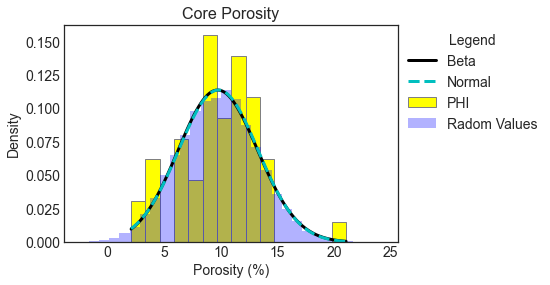

fit params:  2698.278726837274 52818.47226009355 -176.86584567151687 3840.219936035941
mean:     9.7309
sem:      0.0350
median:   9.7729
min:     -2.5506
max:      24.3417
stdev:    3.4950
skew:     0.0171
kurt:    -0.0235
p05:      3.9912
p50:      9.7729
p95:      15.4861
Count:    10000


In [62]:
from scipy.stats import beta
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.rcParams["figure.figsize"]=6,4
x=np.array(phi['PHI_Plug'])*100

# Syntax for a  bound Beta Distribution
# where a and b are shape parametrs alpha and beta, scale is the spread and loc in the most-like (mode)
#rvs(a, b, loc=0, scale=1, size=1, random_state=None)     # Generate random values
#pdf(x, a, b, loc=0, scale=1)                             # Probability Density

######### Fit a Beta Distribution
bx=np.linspace(np.min(x), np.max(x),100)
a,b,scale,loc = beta.fit(x)                               # Estimate shape parameters, scale and loc
pdf_beta = stats.beta.pdf(bx, a, b, scale, loc)           # Create a Beta PDF
bvals = stats.beta.rvs(a, b, scale, loc, size=10000)      # Generate random values following a Beta Distribution

######### Normal Distribution Syntax
# rvs(loc=mean, scale=std, size=1, random_state=None)     # Generate random values
# pdf(x, loc=mean, scale=std)                             # Probability Density

######### Fit a Normal Distribution
m, s = stats.norm.fit(x)                                  # Estimate mean and standard deviation 
pdf_norm = stats.norm.pdf(bx, m, s)                       # Create a Normal PDF 
nvals =    stats.norm.rvs(m, s, size=10000)               # Generate random values following a Normal Distribution

plt.plot(bx, pdf_beta, lw=3, c='k', label="Beta")
plt.plot(bx, pdf_norm, lw=3, c='c', linestyle='--', label='Normal')
plt.hist(x, bins=15, density=True, edgecolor='gray', facecolor='yellow', label='PHI')
plt.hist(bvals, bins=30, density=True, alpha=.3, facecolor='b', label='Radom Values')
plt.legend(shadow=True, bbox_to_anchor=(.99, 1.02), title='Legend')
plt.title('Core Porosity', fontsize=16)
plt.xlabel('Porosity (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Descriptive Statistics of Beta 10,000 Beta Random Values
print('fit params: ', a, b, scale, loc)
print('mean:   ','{: .4f}'.format(np.mean(bvals)))
print('sem:    ','{: .4f}'.format(stats.sem(bvals)))
print('median: ','{: .4f}'.format(np.median(bvals)))
print('min:    ','{: .4f}'.format(np.min(bvals)))
print('max:    ','{: .4f}'.format(np.max(bvals)))
print('stdev:  ','{: .4f}'.format(np.std(bvals)))
print('skew:   ','{: .4f}'.format(skew(bvals)))
print('kurt:   ','{: .4f}'.format(kurtosis(bvals)))
print('p05:    ','{: .4f}'.format(np.percentile(bvals,5)))
print('p50:    ','{: .4f}'.format(np.percentile(bvals,50)))
print('p95:    ','{: .4f}'.format(np.percentile(bvals,95)))
print('Count:  ','{: .0f}'.format(np.count_nonzero(bvals)))
